# Data Wrangling with Pyton Pandas
In this notebook, we will see the most common steps to import and manipulate data:
1. Import Data from CSV file in Pyton using Pandas Library.
2. Preliminary DataFrame Inspection.
3. Cleaning the Imported Data.
4. Missing data.
5. Erronious data
6. Extract & Eporting data


## Problem Statement

The Bank Indessa has not done well in last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.

After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.

This bank uses a pool of investors to sanction their loans. For example: If any customer has applied for a loan of $20000, along with bank, the investors perform a due diligence on the requested loan application. Keep this in mind while understanding data.

In this challenge, you will help this bank by predicting the probability that a member will default.

|	Variable	|	Description	|
|	---	|	---	|
|	member_id	|	unique ID assigned to each member	|
|	loan_amnt	|	loan amount ($) applied by the member	|
|	funded_amnt	|	loan amount ($) sanctioned by the bank	|
|	funded_amnt_inv	|	loan amount ($) sanctioned by the investors	|
|	term	|	term of loan (in months)	|
|	batch_enrolled	|	batch numbers allotted to members	|
|	int_rate	|	interest rate (%) on loan	|
|	grade	|	grade assigned by the bank	|
|	sub_grade	|	grade assigned by the bank	|
|	emp_title	|	job / Employer title of member	|
|	emp_length	|	employment length, where 0 means less than one year and 10 means ten or more years	|
|	home_ownership	|	status of home ownership	|
|	annual_inc	|	annual income ($) reported by the member	|
|	verification_status	|	status of income verified by the bank	|
|	pymnt_plan	|	indicates if any payment plan has started against loan	|
|	desc	|	loan description provided by member	|
|	purpose	|	purpose of loan	|
|	title	|	loan title provided by member	|
|	zip_code	|	first three digits of area zipcode of member	|
|	addr_state	|	living state of member	|
|	dti	|	ratio of member's total monthly debt repayment excluding mortgage divided by self reported monthly income	|
|	delinq_2yrs	|	number of 30+ days delinquency in past 2 years	|
|	inq_last_6mths	|	number of inquiries in last 6 months	|
|	mths_since_last_delinq	|	number of months since last delinq	|
|	mths_since_last_record	|	number of months since last public record	|
|	open_acc	|	number of open credit line in member's credit line	|
|	pub_rec	|	number of derogatory public records	|
|	revol_bal	|	total credit revolving balance	|
|	revol_util	|	amount of credit a member is using relative to revol_bal	|
|	total_acc	|	total number of credit lines available in members credit line	|
|	initial_list_status	|	unique listing status of the loan - W(Waiting), F(Forwarded)	|
|	total_rec_int	|	interest received till date	|
|	total_rec_late_fee	|	Late fee received till date	|
|	recoveries	|	post charge off gross recovery	|
|	collection_recovery_fee	|	post charge off collection fee	|
|	collections_12_mths_ex_med	|	number of collections in last 12 months excluding medical collections	|
|	mths_since_last_major_derog	|	months since most recent 90 day or worse rating	|
|	application_type	|	indicates when the member is an individual or joint	|
|	verification_status_joint	|	indicates if the joint members income was verified by the bank	|
|	last_week_pay	|	indicates how long (in weeks) a member has paid EMI after batch enrolled	|
|	acc_now_delinq	|	number of accounts on which the member is delinquent	|
|	tot_coll_amt	|	total collection amount ever owed	|
|	tot_cur_bal	|	total current balance of all accounts	|
|	total_rev_hi_lim	|	total revolving credit limit	|
|	loan_status	|	status of loan amount, 1 = Defaulter, 0 = Non Defaulters	|
|		|		|
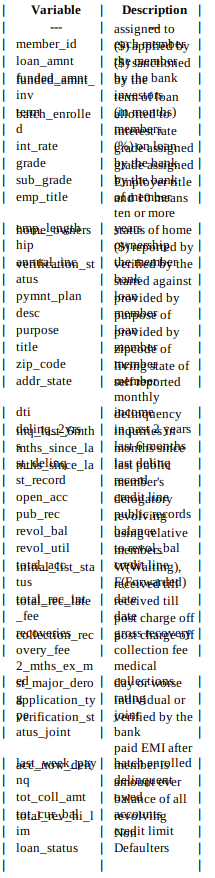

### Step 1: To Import the DataFrame use read_csv('path')

In [2]:
# Step 1: To Import the DataFrame use read_csv('path')
import pandas as pd
import numpy as np
path = "/home/vsholkar/Documents/Datascience/myprojects/sbds-prework/Datasets/bank/train_indessa.csv"
bankdf1= pd.read_csv(path)

#### Here are some more arguments for the .read_csv( ) method
* pd.read_csv('path', **header** = none) <-- "Hey Pandas - there is no header - put numbers as indexes"
* pd.read_csv('path', **names** =['id','principal','granted',...]) <-- "Use these **names** list for header instead.
* pd.read_csv('path', **na_values** = {'principal':[' ',' -1']} <-- Null value or Not-a-number dictionary
* pd.read_csv('path', **parse_dates**=[[0,1,2]]) <-- Here is a list of lists whoes column indexes hold **year, month, day** please combine to a date.
* pd.read_csv('path', **parse_dates**=True) <-- Here we can force date columns to be imported as **datetime** objects

#### To change Row index to any other column in the DataFrame, do the following:
    bankdf.index = bankdf["member_id"] <-- "Hey Pandas - please use "member_id" entries as the row index
    bankdf.index.name = "unique_id" <-- "Hey Pandas - please use "unique_id" as the new name instead of "member_id"
    



### Step 2: Preliminary DataFrame Inspection
* df.shape
* df.columns
* df.info()
* type(df)
* df.describe()

In [66]:
print(type(bankdf1)) # Print Data Type of bankdf1
print(bankdf1.shape) # Print Dimensions of bankdf1
print(bankdf1.columns)# Print column names of bankdf1

<class 'pandas.core.frame.DataFrame'>
(532428, 45)
Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')


In [67]:
print(bankdf1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
member_id                      532428 non-null int64
loan_amnt                      532428 non-null int64
funded_amnt                    532428 non-null int64
funded_amnt_inv                532428 non-null float64
term                           532428 non-null object
batch_enrolled                 447279 non-null object
int_rate                       532428 non-null float64
grade                          532428 non-null object
sub_grade                      532428 non-null object
emp_title                      501595 non-null object
emp_length                     505537 non-null object
home_ownership                 532428 non-null object
annual_inc                     532425 non-null float64
verification_status            532428 non-null object
pymnt_plan                     532428 non-null object
desc                           75599 non-null object
purpose                   

In [4]:
bankdf1.describe() #Statistical exploratory data analysis [Ignores null entries]
#bankdf1.mean()
#bankdf1.median()
#bankdf1.quartile()
#bankdf1.min()
#bankdf1.max()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


### Step 4: Preliminary DataFrame Inspection

In [68]:
bankdf1.head() #print top 5 rows of bankdf1

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [69]:
bankdf1.tail() #print bottom 5 rows of bankdf1

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
532423,31296187,20000,20000,20000.0,36 months,,12.49,B,B5,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60 months,BAT2003848,14.99,C,C5,Account Mgr,...,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60 months,NaN,20.80,E,E1,Comcast cable,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60 months,BAT3193689,16.29,D,D2,Resident Physician,...,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0,0
532427,46122259,10000,10000,10000.0,36 months,BAT4136152,6.39,A,A2,Health Care Analyst,...,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,47866.0,21700.0,0


In [70]:
# Sclicing Imported pandas data use iloc[row slice, column slice]
print(type(bankdf1.iloc[:3,:5]))
print(bankdf1.iloc[:3,:5])

<class 'pandas.core.frame.DataFrame'>
   member_id  loan_amnt  funded_amnt  funded_amnt_inv       term
0   58189336      14350        14350          14350.0  36 months
1   70011223       4800         4800           4800.0  36 months
2   70255675      10000        10000          10000.0  36 months


In [71]:
# Sclicing Imported pandas data use loc(rowlable,columnlables)
print(type(bankdf1.loc[:7,["member_id","loan_amnt"]]))
print(bankdf1.loc[:7,["member_id","loan_amnt"]])

<class 'pandas.core.frame.DataFrame'>
   member_id  loan_amnt
0   58189336      14350
1   70011223       4800
2   70255675      10000
3    1893936      15000
4    7652106      16000
5   10247268      15000
6    8089625       5000
7   23043116       6000


### Step 2: Cleaning the Imported Data
Data almost never comes clean.
* Untidy Data
* Inconsistent column names - [capitals, mixed, spaces, special characters, apostrophe]
* Wrong Column types - [numberic fields that show up as text, characters mixed in with numbers]
* Duplicate Rows or Columns
* Missing Data
* Outliers





### Step 3: Missing Data
* emptycells = df1['column name/index].isnull() <-- boolean
* notemptycells = df1['column name/index].notnull() <-- boolean
* df1.dropna() <-- drops the ROWs with null values
* df1.dropna(axis=1) <-- drops the COLUMJNS with null values
* df1.replace('',np.nan, inplace=True) <-- replace all blanks in a DataFrame with NaN

In [113]:
# Find blanks in a DataFrame
emptycellsdf1=bankdf1['batch_enrolled'].isnull()
noemptycellsdf1=bankdf1['mths_since_last_major_derog'].notnull()
print('bankdf1 -->', bankdf1.shape)
print('empty Cells for batch_enrolled column--->', bankdf1[emptycellsdf1].shape)
print('non empty cells for mths_since_last_major_derog column --->', bankdf1[noemptycellsdf1].shape)
print('Hypothesis1: Customers who have Fewer months since last derogatory are potential high risk of default')
print(bankdf1[noemptycellsdf1])


bankdf1 --> (532428, 45)
empty Cells for batch_enrolled column---> (85149, 45)
non empty cells for mths_since_last_major_derog column ---> (132980, 45)
Hypothesis1: Customers who have Fewer months since last derogatory are potential high risk of default
        member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0        58189336      14350        14350          14350.0  36 months   
7        23043116       6000         6000           6000.0  36 months   
10       56621560      25000        25000          24975.0  36 months   
11        4221941      15000        15000          15000.0  36 months   
16        9878144      18450        18450          18450.0  60 months   
17       12866989      30750        30750          30700.0  36 months   
20       66791957      20000        20000          20000.0  60 months   
26       17563299       7200         7200           7150.0  36 months   
35       51096102      10000        10000          10000.0  60 months   
50        173249

In [72]:
# if you extract a single column out of a DataFrame it gives rise to a 1 dimentional numpy array or a Series
banks1= bankdf1['member_id']
print(type(banks1))
print(banks1[:3])

# different methods in the Series extracts
banknp1=banks1.values # Extracting values from a DataFrame gives a numpy array
print(banks1.head())
print(type(banknp1))
print(banknp1.shape)

<class 'pandas.core.series.Series'>
0    58189336
1    70011223
2    70255675
Name: member_id, dtype: int64
0    58189336
1    70011223
2    70255675
3     1893936
4     7652106
Name: member_id, dtype: int64
<class 'numpy.ndarray'>
(532428,)


### Step 5: Extract & Export the data

In [65]:
#select the columns from bankdf1 Dataframe with top 10 rows and export it to Dataframe bankdf2
bankdf2 = bankdf1.loc[:10,['member_id','application_type','emp_title','loan_amnt','int_rate']]
print(type(bankdf2))
print(bankdf2)
#export to another comma separated file csv
bankdf2.to_csv("/home/vsholkar/Documents/Datascience/myprojects/sbds-prework/Datasets/bank/bankdf2.csv")
#export to another tab separated file tsv
bankdf2.to_csv("/home/vsholkar/Documents/Datascience/myprojects/sbds-prework/Datasets/bank/bankdf2.tsv", sep ='\t')
#export to another csv
bankdf2.to_excel("/home/vsholkar/Documents/Datascience/myprojects/sbds-prework/Datasets/bank/bankdf2.xlsx")

<class 'pandas.core.frame.DataFrame'>
    member_id application_type                          emp_title  loan_amnt  \
0    58189336       INDIVIDUAL                              clerk      14350   
1    70011223       INDIVIDUAL         Human Resources Specialist       4800   
2    70255675       INDIVIDUAL                             Driver      10000   
3     1893936       INDIVIDUAL  Us office of Personnel Management      15000   
4     7652106       INDIVIDUAL        LAUSD-HOLLYWOOD HIGH SCHOOL      16000   
5    10247268       INDIVIDUAL                  Design Consultant      15000   
6     8089625       INDIVIDUAL          TOYOTA OF NORTH HOLLYWOOD       5000   
7    23043116       INDIVIDUAL                             Banker       6000   
8    45900933       INDIVIDUAL                                LVN       6000   
9    41272507       INDIVIDUAL                   Registered Nurse      34550   
10   56621560       INDIVIDUAL                   VP of Operations      25000   

 

# Plotting with Pandas
**Ploting lists and Numpy arrays** <-- Single line plots
* import matplotlib.pyplot as plt
* plt.plot(array)
* plt.show()

**Plots can also be created from Pandas Series** <-- Single line plots
* series1.plot()
* plt.show()

**Plot entire Pandas DataFrame**
* df1.plot() <-- Prints all the columns of a DataFrame
* plt.show()

* df1['columnname'].plot() <-- Prints Individual Columns of the DataFrame
* plt.show()

#### Fixing Scales of Plots & Customization
* df1.plot()
* **plt.yscale('log')**
* plt.show()


* df1['column1'].plot(**color=**'r', **style=**'.-', **legend**=True)
* df1['columns2'].plot(**color=**'b', **style=**'.', **legend**=True)
* plt.axis(('2001','2002',0,100) <-- Zoom the X axis to 2001 & Y axis to 100 
* plt.show()

#### Saving Plots
* df1.loc['2001':'2004',['column1','column2,'columns3']].plot()
* plt.savefig('df1.png')
* plt.savefig('df1.jpg')
* plt.savefig('df1.pdf')
* plt.show()

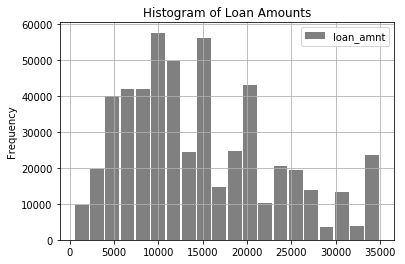

Histogram shows that the largest frequency of loans are 10K, 15K, 20K


In [143]:
# Going back to the bank dataset - we want to visualize a histogram of the loan_amt
import matplotlib.pyplot as plt
bankdf1.loc[:,'loan_amnt'].plot.hist(color='grey', grid=True, bins=20, rwidth=0.9, title='Histogram of Loan Amounts', legend=True)
plt.show()
print('Histogram shows that the largest frequency of loans are 10K, 15K, 20K')

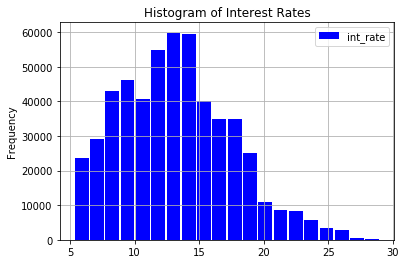

Histogram shows that most of the loans are structured between 12 and 15% -  there is also a long tail in the distribution that suggests there are some loans at a very high interest rate >20%.


In [151]:
import matplotlib.pyplot as plt
bankdf1.loc[:,'int_rate'].plot.hist(color='blue', grid=True, bins=20, rwidth=0.9, title='Histogram of Interest Rates', legend=True)
plt.show()
print('Histogram shows that most of the loans are structured between 12 and 15% -  there is also a long tail in the distribution that suggests there are some loans at a very high interest rate >20%.')

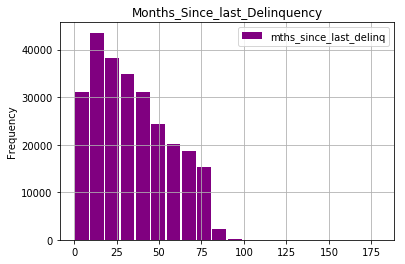

Histogram shows that the largest frequency of loans are 10K, 15K, 20K


In [166]:
import matplotlib.pyplot as plt
bankdf1.loc[:,'mths_since_last_delinq'].plot.hist(color='purple', grid=True, bins=20, rwidth=0.9, title='Months_Since_last_Delinquency', legend=True)
plt.show()
print('Histogram shows that the largest frequency of loans are 10K, 15K, 20K')

In [171]:
import matplotlib.pyplot as plt
bankdf1['addr_state'].plot.bar(color='purple', grid=True, title='Months_Since_last_Delinquency',legend=True)
plt.show()
print('K')

TypeError: Empty 'DataFrame': no numeric data to plot